In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

# Set style
plt.style.use('seaborn-v0_8-notebook')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]

In [42]:
# 1. Load and Initial Exploration
lab_events = pd.read_csv('LABEVENTS.csv')
chart_events = pd.read_csv('CHARTEVENTS.csv')
output_events = pd.read_csv('OUTPUTEVENTS.csv')
input_events = pd.read_csv('INPUTEVENTS_MV.csv')
micro_events = pd.read_csv('MICROBIOLOGYEVENTS.csv')
d_items = pd.read_csv('D_ITEMS.csv')
d_labitems = pd.read_csv('D_LABITEMS.csv')

/var/folders/nb/gzkwgsjx2pb7pr6m_8hppqq80000gn/T/ipykernel_92537/408505556.py:3: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  chart_events = pd.read_csv('CHARTEVENTS.csv')


In [43]:
# 1. Basic Dataset Information
for name, df in {
    'Lab Events': lab_events,
    'Chart Events': chart_events,
    'Output Events': output_events,
    'Input Events': input_events,
    'Microbiology Events': micro_events
}.items():
    print(f"\n{name} Dataset:")
    #print(f"Shape: {df.shape}")
    print("\nColumns:")
    print(df.columns.tolist())
    #print("\nMissing Values:")
    #print(df.isnull().sum())
    #print("\nSample Data:")
    #display(df.head())


Lab Events Dataset:

Columns:
['row_id', 'subject_id', 'hadm_id', 'itemid', 'charttime', 'value', 'valuenum', 'valueuom', 'flag']

Chart Events Dataset:

Columns:
['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'itemid', 'charttime', 'storetime', 'cgid', 'value', 'valuenum', 'valueuom', 'warning', 'error', 'resultstatus', 'stopped']

Output Events Dataset:

Columns:
['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'charttime', 'itemid', 'value', 'valueuom', 'storetime', 'cgid', 'stopped', 'newbottle', 'iserror']

Input Events Dataset:

Columns:
['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'starttime', 'endtime', 'itemid', 'amount', 'amountuom', 'rate', 'rateuom', 'storetime', 'cgid', 'orderid', 'linkorderid', 'ordercategoryname', 'secondaryordercategoryname', 'ordercomponenttypedescription', 'ordercategorydescription', 'patientweight', 'totalamount', 'totalamountuom', 'isopenbag', 'continueinnextdept', 'cancelreason', 'statusdescription', 'comments_editedby', 'comments_cancele

Lab Events Analysis:


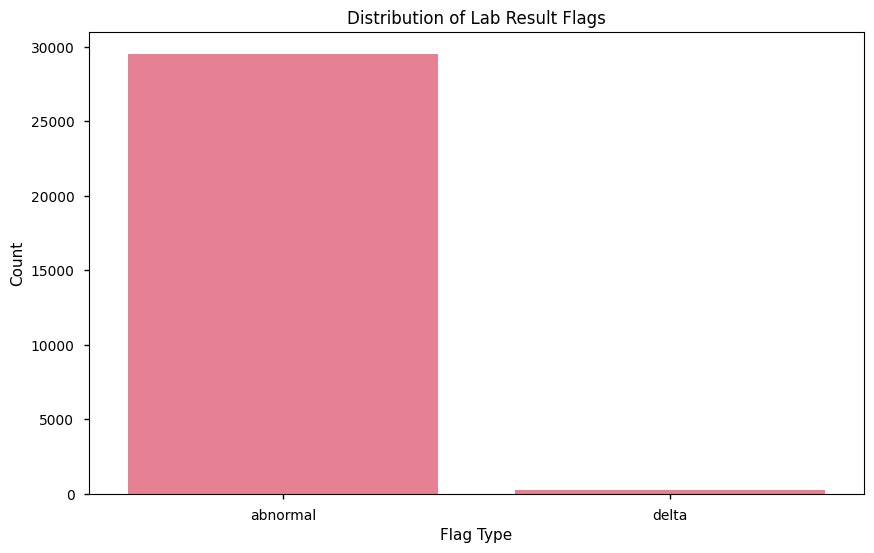

In [44]:
# 2. Lab Events Analysis
print("Lab Events Analysis:")
# Analyze flag distribution (abnormal results)
flag_dist = lab_events['flag'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=flag_dist.index, y=flag_dist.values)
plt.title('Distribution of Lab Result Flags')
plt.xlabel('Flag Type')
plt.ylabel('Count')
plt.show()

In [45]:
# Analyze value distributions for numeric results
numeric_labs = lab_events[lab_events['valuenum'].notna()]
print(f"\nTotal numeric lab results: {len(numeric_labs):,}")
print(f"Percentage of numeric results: {(len(numeric_labs)/len(lab_events))*100:.2f}%")


Total numeric lab results: 67,030
Percentage of numeric results: 88.11%


In [46]:
# 3. Chart Events Analysis
# Focus on vital signs and measurements
print("\nChart Events Analysis:")
# Check value distributions
value_stats = chart_events['valuenum'].describe()
print("\nValue Statistics:")
print(value_stats)


Chart Events Analysis:

Value Statistics:
count    3.238840e+05
mean     8.157890e+01
std      3.911579e+03
min     -5.000000e+02
25%      4.000000e+00
50%      3.500000e+01
75%      9.200000e+01
max      2.222222e+06
Name: valuenum, dtype: float64


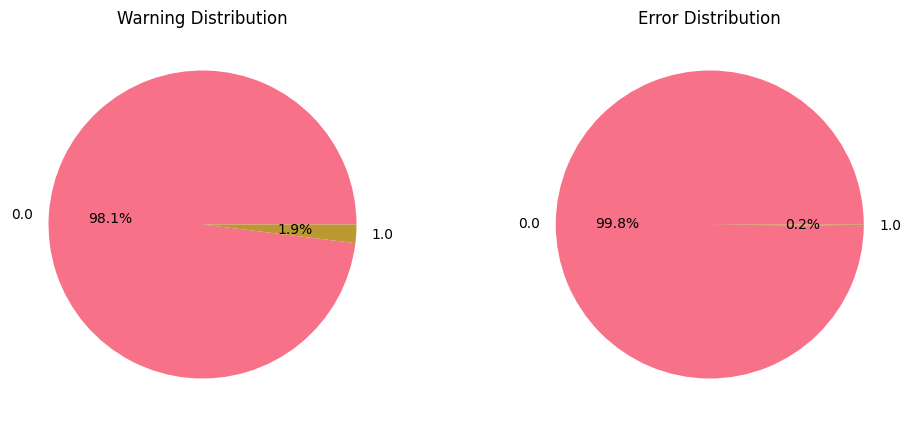

In [47]:
# Analyze warning and error flags
warning_counts = chart_events['warning'].value_counts()
error_counts = chart_events['error'].value_counts()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(warning_counts.values, labels=warning_counts.index, autopct='%1.1f%%')
plt.title('Warning Distribution')
plt.subplot(1, 2, 2)
plt.pie(error_counts.values, labels=error_counts.index, autopct='%1.1f%%')
plt.title('Error Distribution')
plt.show()

In [48]:
# 4. Input/Output Analysis
print("\nInput/Output Analysis:")
# Analyze input durations
input_events['duration'] = pd.to_datetime(input_events['endtime']) - pd.to_datetime(input_events['starttime'])
duration_stats = input_events['duration'].describe()
print("\nInput Duration Statistics (hours):")
print(duration_stats)


Input/Output Analysis:

Input Duration Statistics (hours):
count                        13224
mean     0 days 03:35:23.734119782
std      0 days 08:55:24.968020137
min              -1 days +14:15:00
25%                0 days 00:01:00
50%                0 days 00:40:00
75%                0 days 03:32:00
max                7 days 19:30:00
Name: duration, dtype: object



Microbiology Analysis:


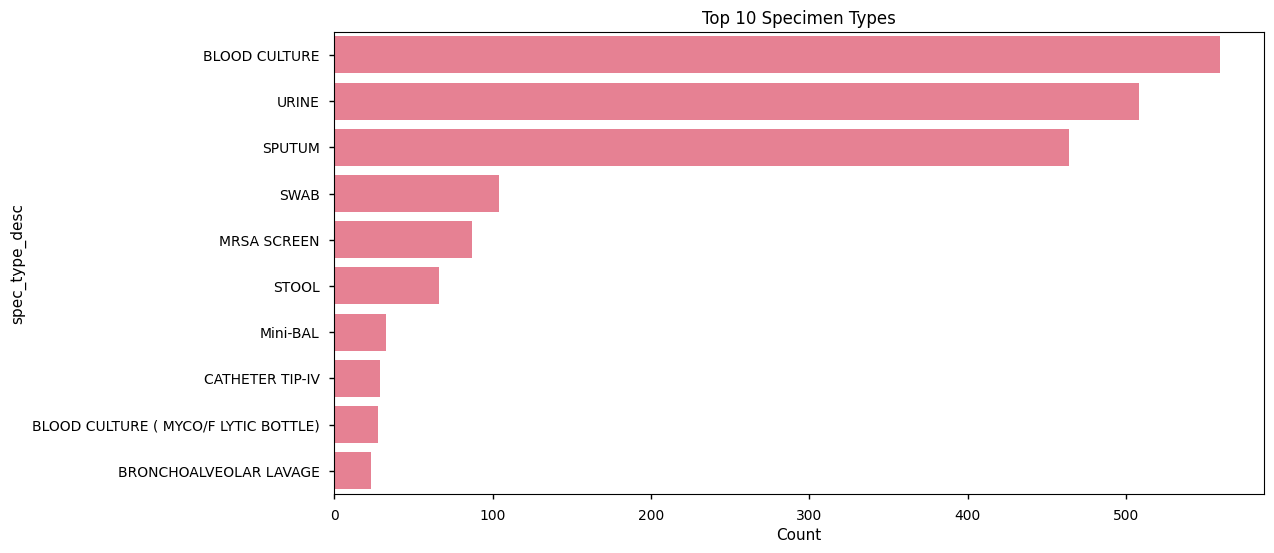

In [49]:
# 5. Microbiology Analysis
print("\nMicrobiology Analysis:")
# Analyze specimen types
spec_dist = micro_events['spec_type_desc'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=spec_dist.values[:10], y=spec_dist.index[:10])
plt.title('Top 10 Specimen Types')
plt.xlabel('Count')
plt.show()

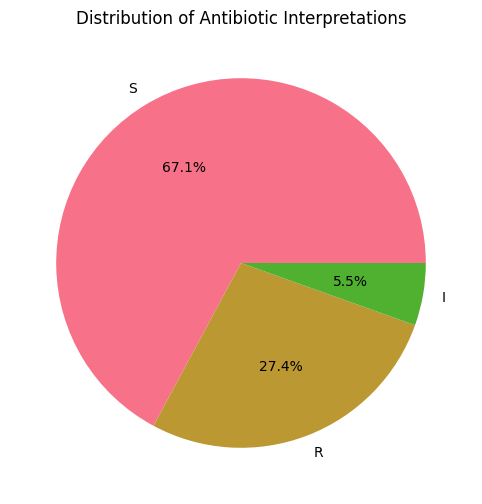

In [50]:
# Analyze antibiotic interpretations
interp_dist = micro_events['interpretation'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(interp_dist.values, labels=interp_dist.index, autopct='%1.1f%%')
plt.title('Distribution of Antibiotic Interpretations')
plt.show()


Patient Care Timeline Analysis:


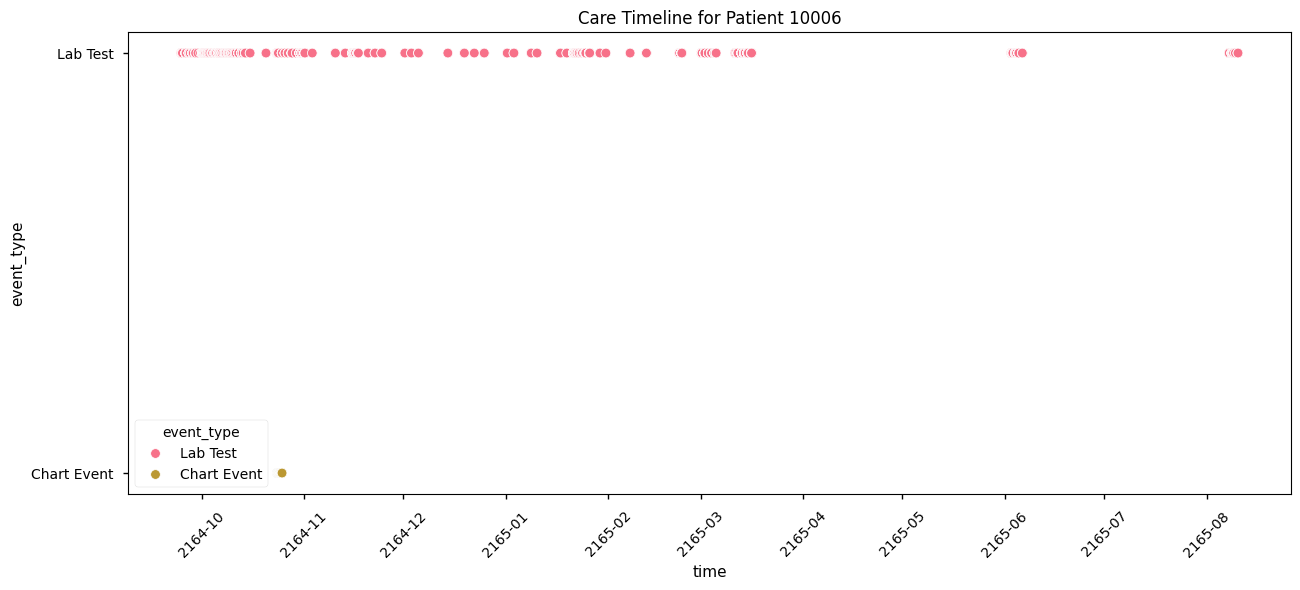

In [51]:
# 6. Patient Care Timeline Analysis
print("\nPatient Care Timeline Analysis:")
# Create timeline of events for a sample patient
sample_patient = lab_events['subject_id'].iloc[0]

# Combine events for the sample patient
timeline_data = pd.concat([
    pd.DataFrame({
        'time': pd.to_datetime(lab_events[lab_events['subject_id'] == sample_patient]['charttime']),
        'event_type': 'Lab Test'
    }),
    pd.DataFrame({
        'time': pd.to_datetime(chart_events[chart_events['subject_id'] == sample_patient]['charttime']),
        'event_type': 'Chart Event'
    }),
    pd.DataFrame({
        'time': pd.to_datetime(input_events[input_events['subject_id'] == sample_patient]['starttime']),
        'event_type': 'Input Start'
    })
])


plt.figure(figsize=(15, 6))
sns.scatterplot(data=timeline_data, x='time', y='event_type', hue='event_type')
plt.title(f'Care Timeline for Patient {sample_patient}')
plt.xticks(rotation=45)
plt.show()

In [52]:
# 7. Cross-Dataset Analysis
print("\nCross-Dataset Analysis:")
# Count events per patient across datasets
patient_events = pd.DataFrame({
    'Lab Events': lab_events['subject_id'].value_counts(),
    'Chart Events': chart_events['subject_id'].value_counts(),
    'Input Events': input_events['subject_id'].value_counts(),
    'Output Events': output_events['subject_id'].value_counts(),
    'Micro Events': micro_events['subject_id'].value_counts()
})

print("\nEvent Counts per Patient:")
print(patient_events.describe())


Cross-Dataset Analysis:

Event Counts per Patient:
        Lab Events  Chart Events  Input Events  Output Events  Micro Events
count   100.000000     99.000000     50.000000      97.000000     91.000000
mean    760.740000   7660.151515    264.480000     116.701031     22.010989
std    1042.027052  12969.910258    567.324629     193.787371     42.535343
min      54.000000     12.000000      4.000000       2.000000      1.000000
25%     200.500000   1330.000000     14.500000      19.000000      3.000000
50%     489.500000   2416.000000     64.500000      41.000000     10.000000
75%     878.750000   8944.000000    196.000000     131.000000     24.000000
max    7262.000000  82169.000000   3094.000000    1357.000000    360.000000


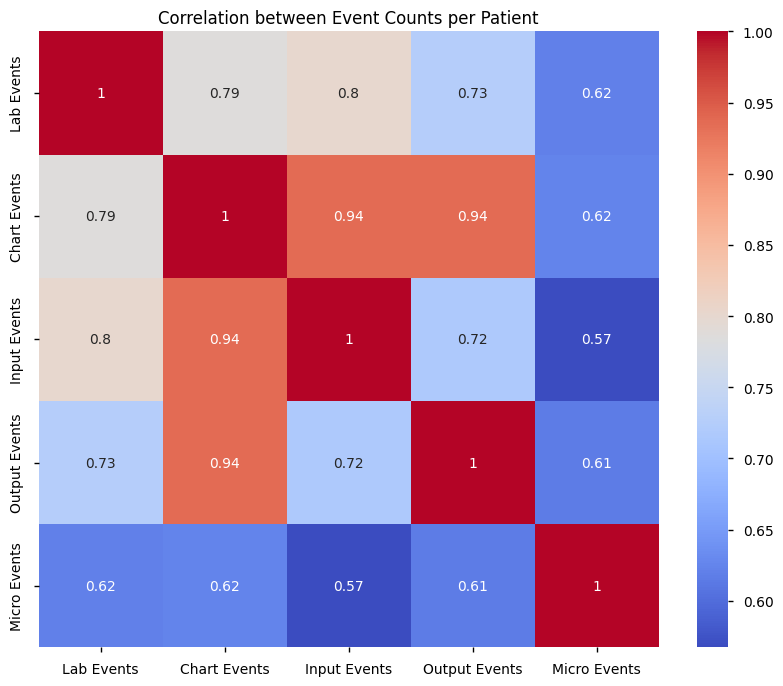


Summary Statistics:

Lab Events:
Total records: 76,074
Unique patients: 100
Date range: 2102-08-01 13:15:00 to 2202-10-11 04:45:00

Chart Events:
Total records: 758,355
Unique patients: 99
Date range: 2102-08-31 17:00:00 to 2202-05-02 22:27:00

Output Events:
Total records: 11,320
Unique patients: 97
Date range: 2102-08-31 18:00:00 to 2202-05-02 20:00:00

Input Events:
Total records: 13,224
Unique patients: 50
Date range: 2102-08-31 17:11:00 to 2202-05-02 20:00:00

Microbiology Events:
Total records: 2,003
Unique patients: 91
Date range: 2102-08-31 22:12:00 to 2202-10-08 13:20:00


In [53]:
# Correlation between event counts
plt.figure(figsize=(10, 8))
sns.heatmap(patient_events.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Event Counts per Patient')
plt.show()

# 8. Summary Statistics
print("\nSummary Statistics:")
for name, df in {
    'Lab Events': lab_events,
    'Chart Events': chart_events,
    'Output Events': output_events,
    'Input Events': input_events,
    'Microbiology Events': micro_events
}.items():
    print(f"\n{name}:")
    print(f"Total records: {len(df):,}")
    print(f"Unique patients: {df['subject_id'].nunique():,}")
    print(f"Date range: {pd.to_datetime(df.filter(like='time').iloc[:,0]).min()} to {pd.to_datetime(df.filter(like='time').iloc[:,0]).max()}")

In [54]:
# Additional Visualizations
# 1. Time-based Analysis
def plot_temporal_patterns():
    plt.figure(figsize=(15, 10))
    
    # Events by hour of day
    plt.subplot(2, 2, 1)
    chart_times = pd.to_datetime(chart_events['charttime'])
    sns.histplot(data=chart_times.dt.hour, bins=24)
    plt.title('Distribution of Events by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Count')
    
    # Events by day of week
    plt.subplot(2, 2, 2)
    sns.histplot(data=chart_times.dt.dayofweek, bins=7)
    plt.title('Distribution of Events by Day of Week')
    plt.xlabel('Day (0=Monday, 6=Sunday)')
    plt.ylabel('Count')
    
    # Monthly trend
    plt.subplot(2, 2, 3)
    monthly_counts = chart_events.groupby(chart_times.dt.to_period('M')).size()
    plt.plot(range(len(monthly_counts)), monthly_counts)
    plt.title('Monthly Trend of Events')
    plt.xlabel('Month Index')
    plt.ylabel('Number of Events')
    
    plt.tight_layout()
    plt.show()

In [55]:

# 2. Input Events Analysis
def analyze_input_patterns():
    plt.figure(figsize=(15, 10))
    
    # Distribution of input durations
    plt.subplot(2, 2, 1)
    input_events['duration_hours'] = (pd.to_datetime(input_events['endtime']) - 
                                    pd.to_datetime(input_events['starttime'])).dt.total_seconds() / 3600
    sns.histplot(data=input_events, x='duration_hours', bins=50)
    plt.title('Distribution of Input Duration')
    plt.xlabel('Duration (hours)')
    
    # Input amounts by category
    plt.subplot(2, 2, 2)
    category_amounts = input_events.groupby('ordercategoryname')['amount'].mean().sort_values(ascending=False)[:10]
    sns.barplot(x=category_amounts.values, y=category_amounts.index)
    plt.title('Average Amount by Order Category')
    plt.xlabel('Average Amount')
    
    # Rate distribution
    plt.subplot(2, 2, 3)
    sns.boxplot(data=input_events, y='rate')
    plt.title('Distribution of Input Rates')
    plt.ylabel('Rate')
    
    plt.tight_layout()
    plt.show()

In [56]:
# 3. Lab Results Analysis
def analyze_lab_patterns():
    plt.figure(figsize=(15, 10))
    
    # Flag distribution by time of day
    plt.subplot(2, 2, 1)
    lab_times = pd.to_datetime(lab_events['charttime'])
    flag_by_hour = lab_events.groupby([lab_times.dt.hour, 'flag']).size().unstack()
    flag_by_hour.plot(kind='bar', stacked=True)
    plt.title('Lab Result Flags by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Count')
    
    # Value distribution for numeric results
    plt.subplot(2, 2, 2)
    sns.boxplot(data=lab_events, y='valuenum')
    plt.title('Distribution of Numeric Lab Values')
    plt.ylabel('Value')
    
    # Top lab tests over time
    plt.subplot(2, 2, 3)
    top_labs = lab_events['itemid'].value_counts().head(5).index
    lab_trends = lab_events[lab_events['itemid'].isin(top_labs)]
    sns.lineplot(data=lab_trends, x=pd.to_datetime(lab_trends['charttime']).dt.to_period('M'), 
                y='valuenum', hue='itemid')
    plt.title('Trends in Top Lab Tests')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

In [57]:
# 4. Patient Care Intensity Analysis
def analyze_care_intensity():
    plt.figure(figsize=(15, 10))
    
    # Events per patient
    plt.subplot(2, 2, 1)
    events_per_patient = pd.DataFrame({
        'Lab': lab_events.groupby('subject_id').size(),
        'Chart': chart_events.groupby('subject_id').size(),
        'Input': input_events.groupby('subject_id').size(),
        'Micro': micro_events.groupby('subject_id').size()
    })
    sns.boxplot(data=events_per_patient)
    plt.title('Distribution of Events per Patient')
    plt.ylabel('Number of Events')
    
    # Care intensity over time (events per day)
    plt.subplot(2, 2, 2)
    daily_events = chart_events.groupby(pd.to_datetime(chart_events['charttime']).dt.date).size()
    plt.plot(daily_events.values)
    plt.title('Daily Care Intensity')
    plt.xlabel('Day Index')
    plt.ylabel('Number of Events')
    
    # Correlation between different event types
    plt.subplot(2, 2, 3)
    sns.heatmap(events_per_patient.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation between Event Types')
    
    plt.tight_layout()
    plt.show()

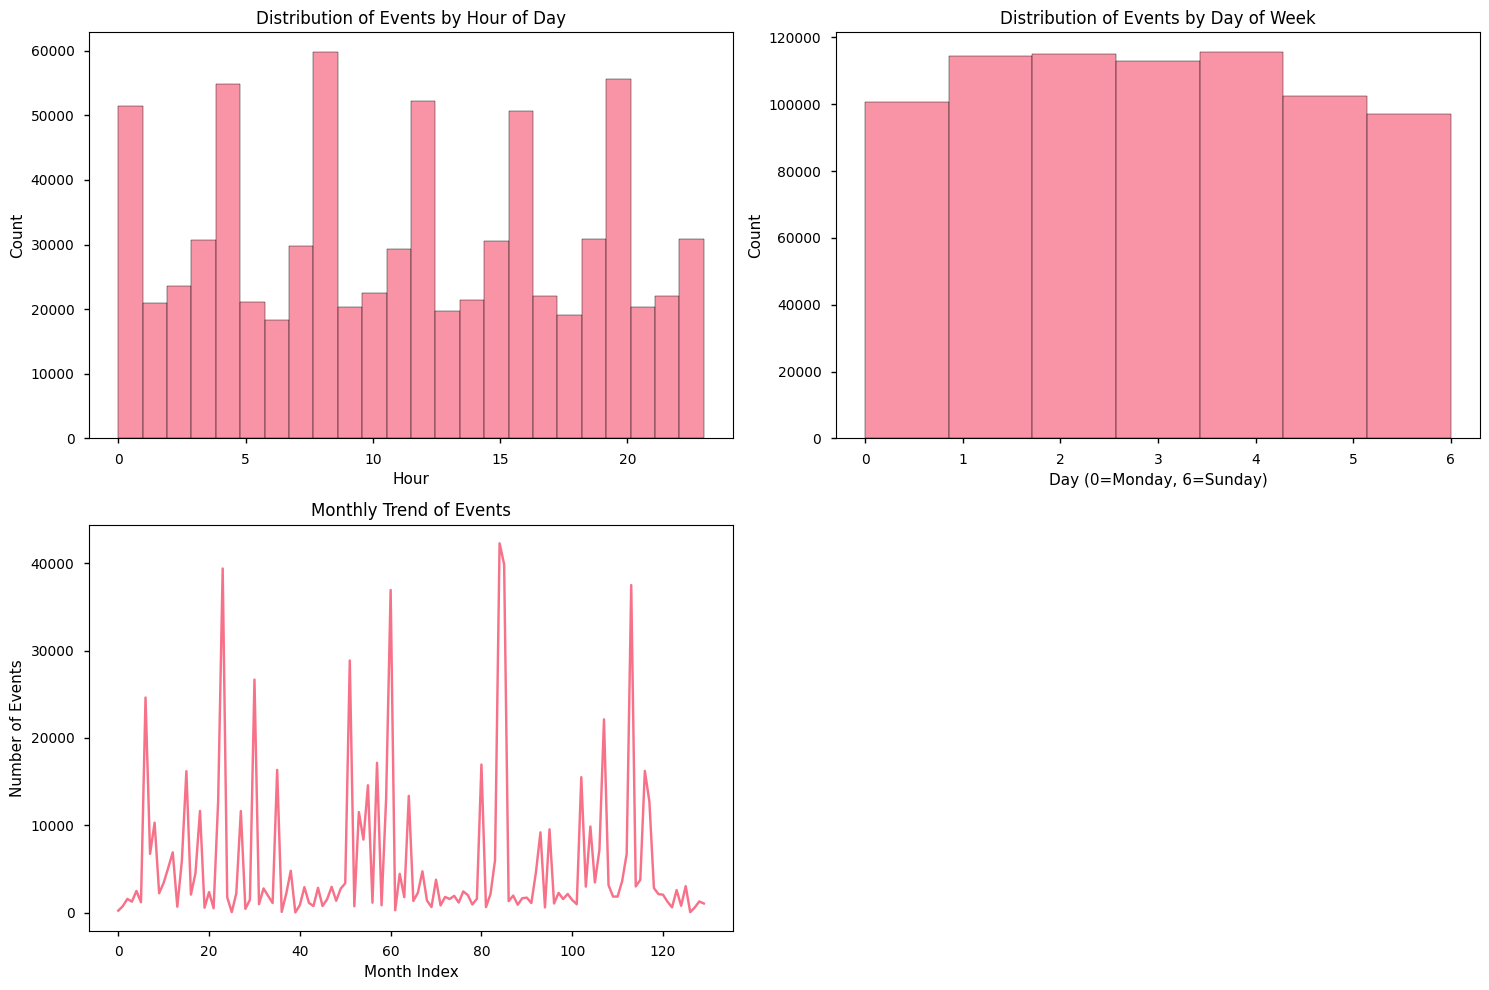

In [58]:
# Run all visualizations
plot_temporal_patterns()

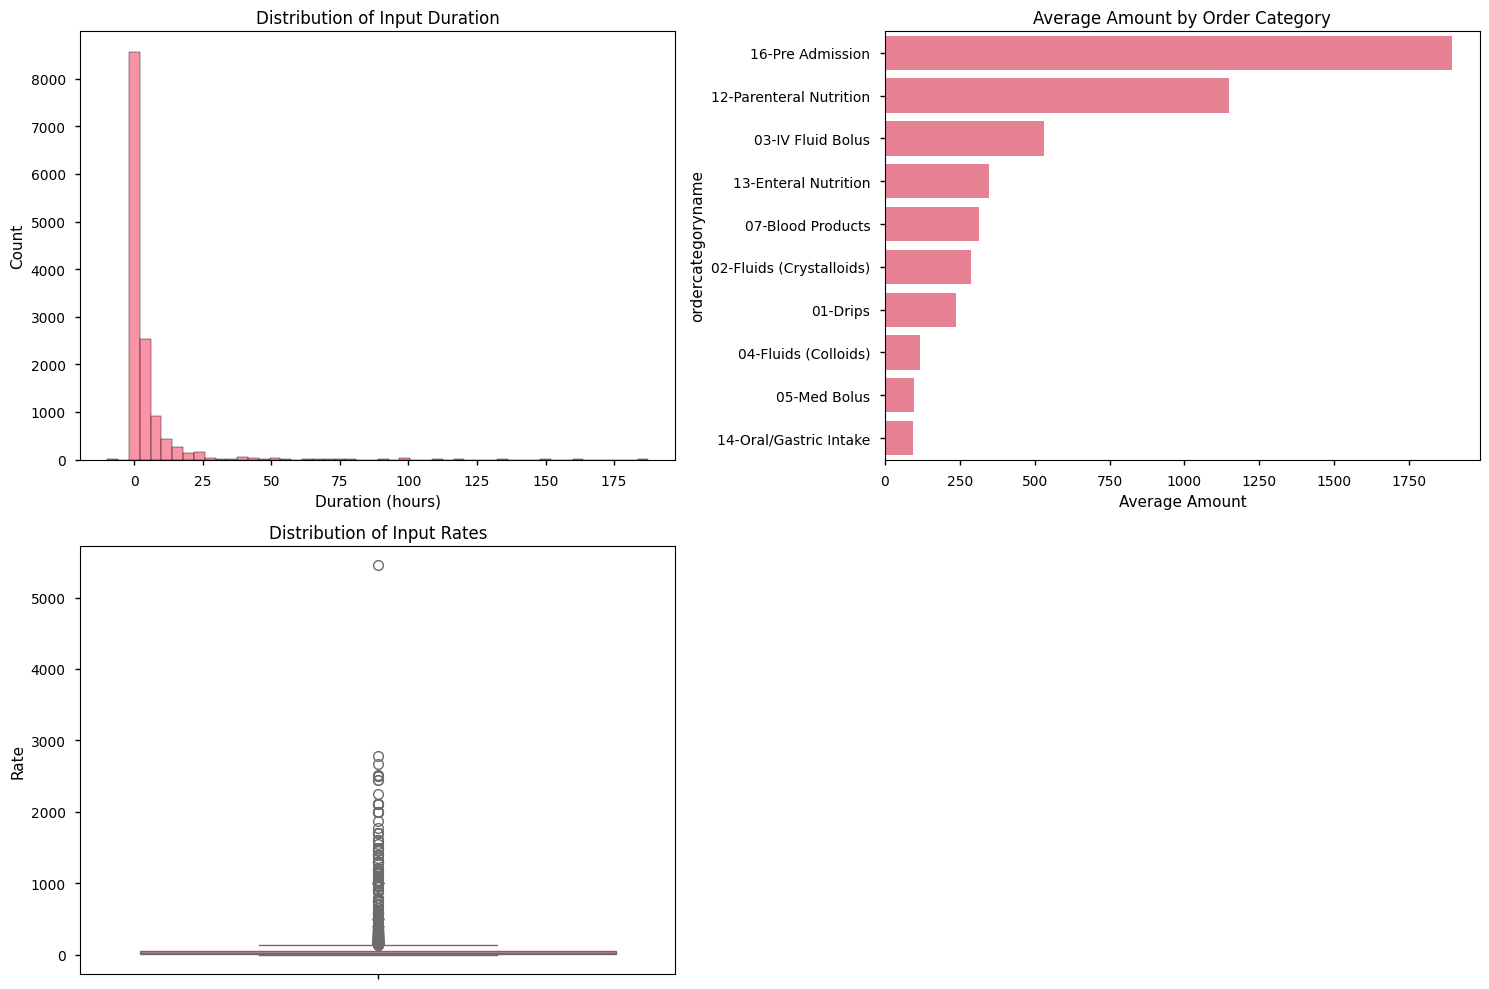

In [59]:
analyze_input_patterns()

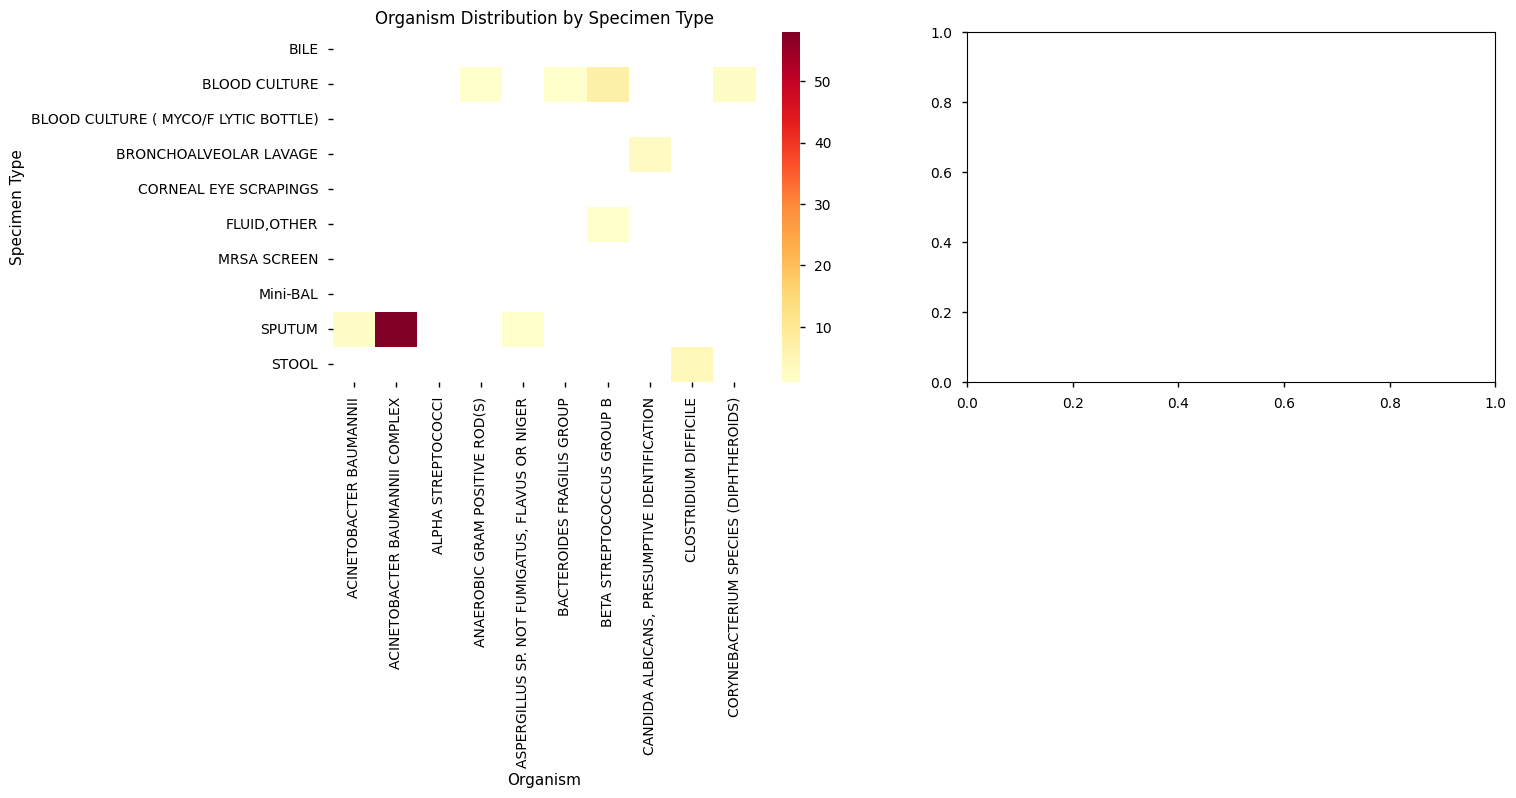

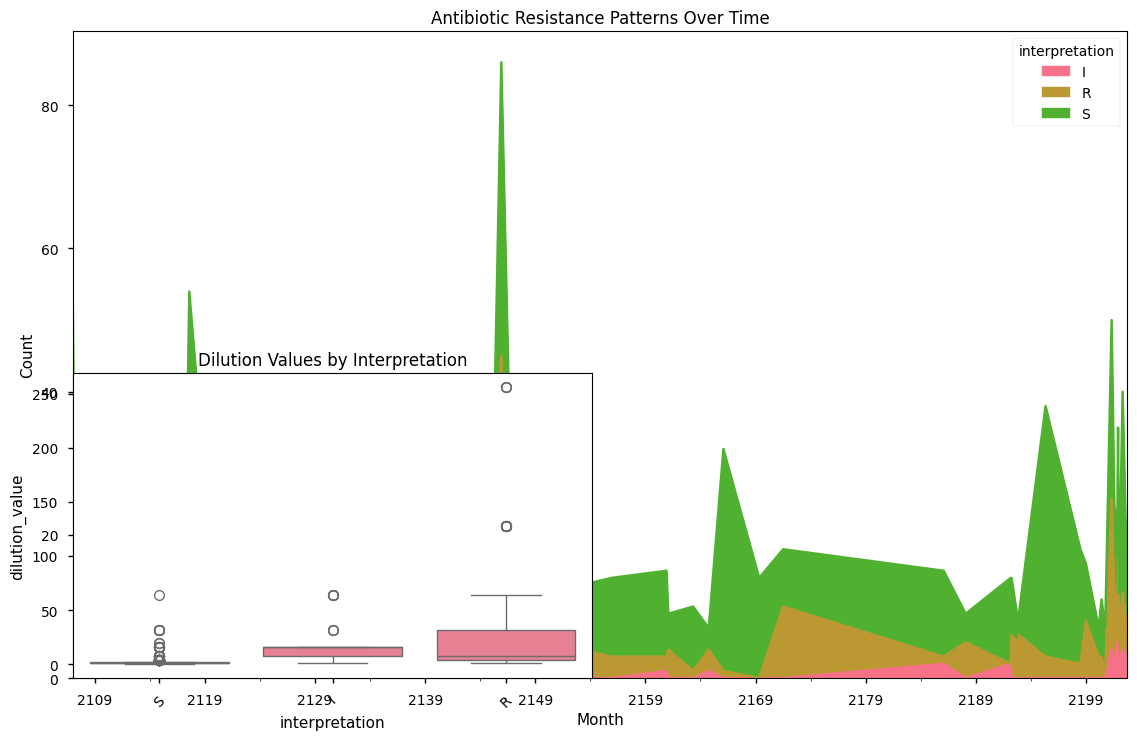

In [60]:
analyze_micro_patterns()

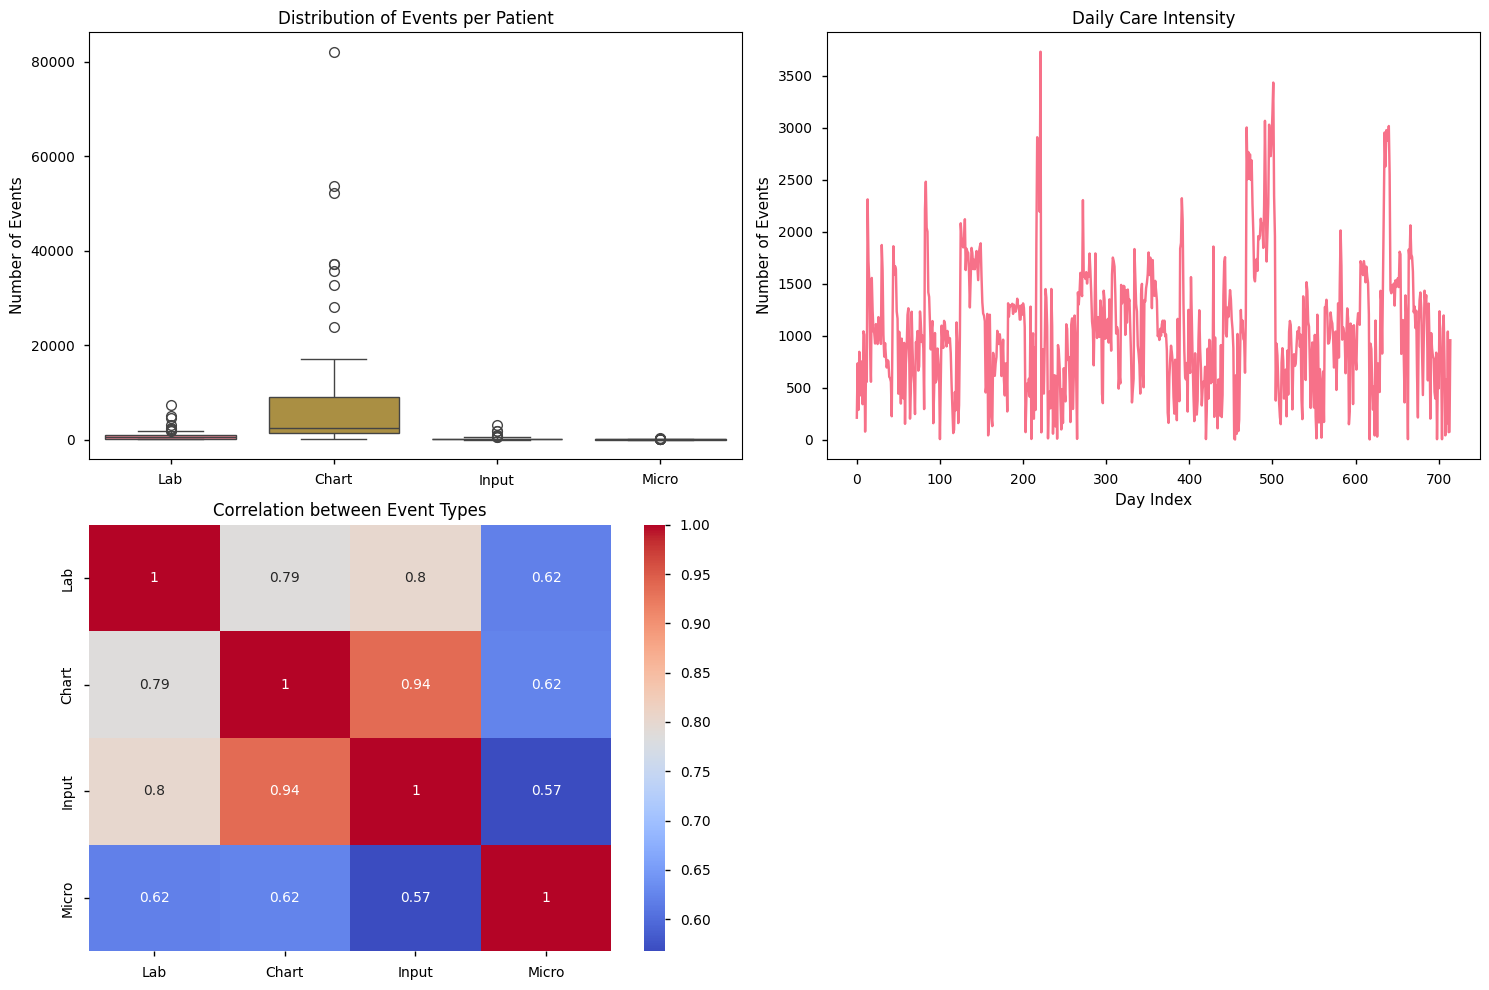

In [61]:
analyze_care_intensity()

In [62]:
# Print summary statistics
print("\nSummary Statistics:")
print("\nInput Events Summary:")
print(input_events['amount'].describe())
print("\nLab Events Summary:")
print(lab_events['valuenum'].describe())
print("\nMicrobiology Results Summary:")
print(micro_events['interpretation'].value_counts(normalize=True))


Summary Statistics:

Input Events Summary:
count    13224.000000
mean       203.067075
std        993.493285
min      -4000.000000
25%          2.915277
50%         34.864490
75%        112.109697
max      25510.203400
Name: amount, dtype: float64

Lab Events Summary:
count    67030.000000
mean        76.745849
std        634.732230
min        -29.000000
25%          4.200000
50%         18.000000
75%         60.000000
max      52950.000000
Name: valuenum, dtype: float64

Microbiology Results Summary:
interpretation
S    0.671473
R    0.273944
I    0.054583
Name: proportion, dtype: float64


In [66]:
!python --version

Python 3.11.9
